### Family and Children Services Crisis Calls - Demographic analysis

#### Demographic Columns: 
 'CRISIS Demographics - Age' \
 'CRISIS Demographics - Ethnicity'\
 'CRISIS Demographics - Gender Identity'\
  'CRISIS Demographics - Education Level' \
  'CRISIS Demographics - Income' \
  'CRISIS Demographics - Marital Status' \
 'CRISIS Demographics - Has a disability?' \
'CRISIS Demographics - Homeless?' \
'CRISIS Demographics - Military' 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
#read in updated CSV with crisis issues broken out by column
data = pd.read_csv('../data/Crisis_2020_IR.csv', engine='python')
data.head(6)

,Unnamed: 0,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,CURRENT SUICIDAL INTENTION/PLAN/ATTEMPT IN PROGRESS,Suicide History/Previous Attempts,Grief due to Suicide Loss,Information about SOSL support group,Third party concerned about anothers suicide risk,CURRENT THOUGHTS/IDEATIONS,Total Suicide Issues,Total Number of Issues,IR Call,Number of Imminent Risk Issues
0,0,82699332,2020-12-31 23:40:00,2020-12-31 23:53:00,13,3769693,116928,Houston,Harris,TX,...,0,0,0,0,0,0,0,4,No,0
1,1,82689642,2020-12-31 22:31:00,2020-12-31 23:00:00,29,-1,136748,NaN,NaN,TN,...,0,0,0,0,0,0,0,2,No,0
2,2,82688780,2020-12-31 21:32:00,2020-12-31 22:02:00,30,-1,139345,NaN,NaN,TN,...,0,0,0,0,0,0,0,7,No,0
3,3,82688656,2020-12-31 21:27:00,2020-12-31 21:43:00,16,-1,136748,NaN,NaN,TN,...,0,0,0,0,0,0,0,5,No,0
4,4,82688670,2020-12-31 21:19:00,2020-12-31 21:26:00,7,-1,139345,Marysville,Snohomish,WA,...,0,0,0,0,0,0,0,3,No,0
5,5,82688455,2020-12-31 21:12:00,2020-12-31 21:18:00,6,-1,139345,NaN,NaN,TN,...,0,0,0,0,0,0,0,7,No,0


In [4]:
# Age group 7-12 formats as a date, this puts it back to original formatting
def age_fix(counter):
    if (counter['CRISIS Demographics - Age'] == '2021-07-12 00:00:00') :
        return '07-12'
    else:
        return counter['CRISIS Demographics - Age']

data['CRISIS Demographics - Age'] = data.apply(age_fix, axis=1)

In [5]:
# Adds a column with "1" for IR Call And "0" for Non IR Call.
def IR2(counter):
    if (counter['IR Call'] == 'Yes') :
        return 1
    else:
        return 0

data['IR Call2'] = data.apply(IR2, axis=1)

In [6]:
data['CRISIS Demographics - Age'].value_counts()

56-70    3212
41-55    3052
31-40     920
25-30     636
18-24     464
13-17     267
70-85      98
07-12      33
85+         1
Name: CRISIS Demographics - Age, dtype: int64

In [7]:
data['CRISIS Demographics - Gender Identity'].value_counts(dropna=False)

Female          8811
NaN             7780
Male            5692
Unidentified      25
Transgender       17
Genderqueer        1
Name: CRISIS Demographics - Gender Identity, dtype: int64

In [8]:
#overall average call length
data['CallLength'].mean()

11.023515184090298

In [9]:
#average call length for calls for particular demographic info

data_only_with_demo = data[~data['CRISIS Demographics - Age'].isnull()]
data_only_with_demo['CallLength'].mean()

12.408384199009559

In [10]:
#average call length for calls for particular demographic info

data_only_with_demo = data[~data['CRISIS Demographics - Ethnicity'].isnull()]
data_only_with_demo['CallLength'].mean()

12.786386410851765

In [14]:
#average call length for calls for particular demographic info

data_only_with_demo = data[~data['CRISIS Demographics - Gender Identity'].isnull()]
data_only_with_demo['CallLength'].mean()

12.418534304963563

In [13]:
#average call length for calls for particular demographic info

data_only_with_demo = data[~data['CRISIS Demographics - Education Level'].isnull()]
data_only_with_demo['CallLength'].mean()

11.997436836323692

In [15]:
#average call length for calls for particular demographic info

data_only_with_demo = data[~data['CRISIS Demographics - Marital Status'].isnull()]
data_only_with_demo['CallLength'].mean()

12.026859225266568

In [12]:
#list of demographic columns
demo_columns = ['CRISIS Demographics - Age', 'CRISIS Demographics - Education Level', 'CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity', 'CRISIS Demographics - Has a disability?', 
'CRISIS Demographics - Homeless?', 'CRISIS Demographics - Income', 'CRISIS Demographics - Marital Status', 'CRISIS Demographics - Military']

In [11]:
# list of column names
for c in data.columns:
    print(c)

Unnamed: 0
CallReportNum
CallDateAndTimeStart
CallDateAndTimeEnd
CallLength
CallerNum
PhoneWorkerNum
CityName
CountyName
StateProvince
PostalCode
CRISIS Demographics - Age
CRISIS Demographics - Education Level
CRISIS Demographics - Ethnicity
CRISIS Demographics - Gender Identity
CRISIS Demographics - Has a disability?
CRISIS Demographics - Homeless?
CRISIS Demographics - Income
CRISIS Demographics - Marital Status
CRISIS Demographics - Military
CRISIS Issues - Abusive Behavior
CRISIS Issues - Call Problems (specify at least 2)
CRISIS Issues - Emotional State
CRISIS Issues - Financial/Basic Needs
CRISIS Issues - Health/Physical
CRISIS Issues - Homicide
CRISIS Issues - Information or Services Needed
CRISIS Issues - Mental Health
CRISIS Issues - No Issue Call
CRISIS Issues - Other Description
CRISIS Issues - Relationships
CRISIS Issues - Substances
CRISIS Issues - Suicide
Child Endangerment
Bullying
Child Sexual Abuse
Other Abusive Behavior
Prejudice
Child Abuse/Neglect
Harassment
Mass Vi

## Call Statistics by Demographic

In [19]:
# Returns a dataframe with CallVolume(# of Calls), 
# call volume percentage of total call volume, and
# average call length for each group within a demographic
def call_stats(demo):
    call_stats = data.groupby(demo, as_index=False, dropna=True).agg({'CallReportNum':'count','CallLength':'mean'}).rename(columns={'CallReportNum':'CallVolume','CallLength':'Avg CallLength'})
    call_stats = call_stats.replace(np.nan, 'not reported', regex=True)
    call_stats['CallVolume Perc'] = 100*call_stats['CallVolume']/call_stats['CallVolume'].sum()
    call_stats = call_stats[[demo, 'CallVolume', 'CallVolume Perc', 'Avg CallLength']]
    return(call_stats)
    call_stats

In [21]:
call_stats('CRISIS Demographics - Age')

,CRISIS Demographics - Age,CallVolume,CallVolume Perc,Avg CallLength
0,07-12,33,0.380053,19.757576
1,13-17,267,3.074974,16.775281
2,18-24,464,5.343775,19.549569
3,25-30,636,7.324657,13.095912
4,31-40,920,10.595416,15.056522
5,41-55,3052,35.149142,10.311271
6,56-70,3212,36.991823,11.820672
7,70-85,98,1.128642,19.469388
8,85+,1,0.011517,13.000000


In [22]:
call_stats('CRISIS Demographics - Ethnicity')

,CRISIS Demographics - Ethnicity,CallVolume,CallVolume Perc,Avg CallLength
0,African-American,2059,25.161921,12.786304
1,Asian,19,0.232189,22.473684
2,Caucasian,5896,72.051815,12.496947
3,Hispanic/Latino,71,0.867652,20.084507
4,Multiracial,10,0.122205,28.400000
5,Native American,4,0.048882,20.250000
6,Other,26,0.317732,21.653846
7,Unidentified/unknown,98,1.197605,18.785714


In [23]:
call_stats('CRISIS Demographics - Ethnicity')

,CRISIS Demographics - Ethnicity,CallVolume,CallVolume Perc,Avg CallLength
0,African-American,2059,25.161921,12.786304
1,Asian,19,0.232189,22.473684
2,Caucasian,5896,72.051815,12.496947
3,Hispanic/Latino,71,0.867652,20.084507
4,Multiracial,10,0.122205,28.400000
5,Native American,4,0.048882,20.250000
6,Other,26,0.317732,21.653846
7,Unidentified/unknown,98,1.197605,18.785714


In [24]:
call_stats('CRISIS Demographics - Gender Identity')

,CRISIS Demographics - Gender Identity,CallVolume,CallVolume Perc,Avg CallLength
0,Female,8811,60.573353,12.970491
1,Genderqueer,1,0.006875,20.000000
2,Male,5692,39.131033,11.565531
3,Transgender,17,0.116871,15.176471
4,Unidentified,25,0.171869,9.920000


In [25]:
call_stats('CRISIS Demographics - Education Level')

,CRISIS Demographics - Education Level,CallVolume,CallVolume Perc,Avg CallLength
0,College graduate,412,15.086049,20.077670
1,High school diploma/GED,1078,39.472721,9.099258
2,Masters/PhD graduate,383,14.024167,14.838120
3,Some college,795,29.110216,10.062893
4,Some graduate level work,11,0.402783,21.272727
5,Some high school,52,1.904064,14.750000


In [26]:
call_stats('CRISIS Demographics - Income')

,CRISIS Demographics - Income,CallVolume,CallVolume Perc,Avg CallLength
0,FT employment,304,10.776320,17.345395
1,PT employment,443,15.703651,16.361174
2,PT employment; Unemployed,1,0.035448,10.000000
3,SNAP,5,0.177242,4.000000
4,SSDI,801,28.394186,8.566792
5,SSDI; PT employment,4,0.141794,18.750000
6,SSDI; SNAP,135,4.785537,6.911111
7,SSDI; Unemployed,505,17.901453,16.104950
8,SSI,41,1.453385,17.829268
9,SSI; PT employment,3,0.106345,19.000000


In [27]:
call_stats('CRISIS Demographics - Marital Status')

,CRISIS Demographics - Marital Status,CallVolume,CallVolume Perc,Avg CallLength
0,Cohabitating,22,0.296936,19.772727
1,Divorced,2678,36.145229,12.799477
2,Engaged,13,0.175462,24.153846
3,Married,338,4.562019,17.411243
4,Separated,207,2.793899,13.763285
5,Single,4086,55.149143,10.751836
6,Widowed,65,0.877311,21.769231


## Number of Issues per Call by Demographic

In [17]:
# returns dataframe with average number of issues per call and 
# average number of IR Issues Per Call within a demographic
def issue_per_call(demo):
    issues_per_call = data.groupby(demo, as_index=False, dropna=False).agg({'Total Number of Issues':'mean','Number of Imminent Risk Issues':'mean'}).rename(columns={'Total Number of Issues':'Avg # Issues Per Call','Number of Imminent Risk Issues':'Avg # IR Issues Per Call'})
    return(issues_per_call)
    issues_per_call

In [18]:
issue_per_call('CRISIS Demographics - Age')

,CRISIS Demographics - Age,Avg # Issues Per Call,Avg # IR Issues Per Call
0,07-12,4.393939,0.060606
1,13-17,4.955056,0.059925
2,18-24,5.745690,0.064655
3,25-30,4.220126,0.048742
4,31-40,5.215217,0.028261
5,41-55,4.403670,0.050459
6,56-70,4.306351,0.033001
7,70-85,5.510204,0.091837
8,85+,8.000000,0.000000
9,NaN,3.493806,0.050869


In [14]:
issue_per_call('CRISIS Demographics - Gender Identity')

,CRISIS Demographics - Gender Identity,Avg # Issues Per Call,Avg # IR Issues Per Call
0,Female,4.677222,0.051867
1,Genderqueer,8.000000,0.000000
2,Male,4.153022,0.036894
3,Transgender,4.588235,0.117647
4,Unidentified,3.080000,0.080000
5,NaN,2.839203,0.051028


In [15]:
issue_per_call('CRISIS Demographics - Ethnicity')

,CRISIS Demographics - Ethnicity,Avg # Issues Per Call,Avg # IR Issues Per Call
0,African-American,4.753764,0.060709
1,Asian,5.000000,0.000000
2,Caucasian,4.674864,0.039858
3,Hispanic/Latino,4.478873,0.056338
4,Multiracial,6.500000,0.300000
5,Native American,3.250000,0.000000
6,Other,5.076923,0.038462
7,Unidentified/unknown,5.887755,0.091837
8,NaN,3.432864,0.048858


In [16]:
issue_per_call('CRISIS Demographics - Marital Status')

,CRISIS Demographics - Marital Status,Avg # Issues Per Call,Avg # IR Issues Per Call
0,Cohabitating,7.045455,0.181818
1,Divorced,4.600448,0.036221
2,Engaged,7.307692,0.230769
3,Married,5.470414,0.068047
4,Separated,4.628019,0.014493
5,Single,4.308860,0.031816
6,Widowed,6.384615,0.076923
7,NaN,3.600188,0.053831


In [17]:
issue_per_call('CRISIS Demographics - Education Level')

,CRISIS Demographics - Education Level,Avg # Issues Per Call,Avg # IR Issues Per Call
0,College graduate,3.783981,0.029126
1,High school diploma/GED,4.180891,0.018553
2,Masters/PhD graduate,4.441253,0.015666
3,Some college,4.201258,0.071698
4,Some graduate level work,6.727273,0.090909
5,Some high school,4.980769,0.076923
6,NaN,3.861291,0.049400


In [18]:
issue_per_call('CRISIS Demographics - Military')

,CRISIS Demographics - Military,Avg # Issues Per Call,Avg # IR Issues Per Call
0,3rd Party Calling about Veteran,3.333333,0.166667
1,Active Duty,4.941176,0.411765
2,Family of Military,4.853659,0.146341
3,N/A (did not serve),4.610258,0.046798
4,Reserves/National Guard,7.333333,0.000000
5,Unknown,4.005701,0.057007
6,Veteran,3.668232,0.015649
7,NaN,0.967912,0.000479


In [19]:
issue_per_call('CRISIS Demographics - Income')

,CRISIS Demographics - Income,Avg # Issues Per Call,Avg # IR Issues Per Call
0,FT employment,5.358553,0.029605
1,PT employment,4.661400,0.011287
2,PT employment; Unemployed,6.000000,0.000000
3,SNAP,1.800000,0.000000
4,SSDI,4.339576,0.081149
5,SSDI; PT employment,5.250000,0.000000
6,SSDI; SNAP,3.555556,0.007407
7,SSDI; Unemployed,5.485149,0.039604
8,SSI,6.463415,0.024390
9,SSI; PT employment,6.666667,0.000000


## Top 5 Issues by Demographic

In [20]:
#read in issue list
issue_df = pd.read_csv('../data/full_list_issues_revised4.csv', engine='python')
issue_list = issue_df['issue'].tolist()

In [21]:
#dictionary to sum all issue columns
function_dict = {str(i):'sum' for i in issue_list}

In [22]:
# Finds the Top 5 Issues and corresponding issue count 
# for the specific demographic group overall
def top5_issue_cumulative(demo):
    global sum_issues_top_5
    subset_data = data[~data[demo].isnull()]
    sum_issues = subset_data.aggregate(function_dict)
    sum_issues = pd.DataFrame(sum_issues)
    sum_issues.columns = ['count']
    sum_issues= sum_issues.sort_values(['count'], ascending=False)
    sum_issues_top_5 = sum_issues.head(5)
    sum_issues_top_5 = sum_issues_top_5.reset_index()
    return(sum_issues_top_5)
    sum_issues_top_5

In [23]:
## Finds the issue counts for the Top 5 Issues with all groups within a demographic
def top5_demo_issue_counts(demographic):
    global demo_top_5_issues
    global top_5_issue_list
    top_5_issue_list = sum_issues_top_5['index'].tolist()
    demo_function_dict = {str(i):'sum' for i in top_5_issue_list}
    demo_function_dict['Total Number of Issues'] = 'sum'
    demo_top_5_issues = data.groupby(demographic, as_index=False).agg(demo_function_dict)
    return(demo_top_5_issues)
    demo_top_5_issues

In [24]:
## Finds the % of prevalence of Top 5 Issues within groups of a demographic
def top5_demo_issue_percent(demographic):
    global demo_top_5_issues_perc
    demo_top_5_issues.set_index(demographic, inplace=True)
    demo_top_5_issues_perc = demo_top_5_issues.div(demo_top_5_issues['Total Number of Issues'], axis=0).fillna(0)
    demo_top_5_issues_perc = demo_top_5_issues_perc.drop(columns='Total Number of Issues')
    demo_top_5_issues_perc = (demo_top_5_issues_perc * 100)
    return(demo_top_5_issues_perc)
    demo_top_5_issues_perc

In [46]:
def issue_line_chart(demographic, demo_short):
    global demo_top_5_issues_perc
    demo_top_5_issues_perc=demo_top_5_issues_perc.reset_index()
    demo_top_5_issues_perc=demo_top_5_issues_perc.rename(columns={demographic:demo_short})
    
    fig,ax = plt.subplots(figsize=(15,5))
    
    for i in top_5_issue_list:
        ax.plot(demo_top_5_issues_perc[demo_short], demo_top_5_issues_perc[i], label = i)
        
    plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    ax.set_xlabel(demo_short, labelpad=20, fontsize=12)
    ax.set_title('Top 5 Issues by ' + str(demo_short), fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_ylabel('% of Calls', fontsize=12)
# plt.savefig('../images/Age_Top5_Issues.jpg', dpi=75, bbox_inches="tight")
plt.show();

### Top 5 Issues By Age

In [47]:
long_demo = 'CRISIS Demographics - Age'
short_demo = 'Age'

In [48]:
top5_issue_cumulative(long_demo)

,index,count
0,Anxious/Stressed,4424
1,Lonely,2675
2,Overwhelmed,2222
3,Anxiety/Panic,2095
4,Family,2040


In [49]:
top5_demo_issue_counts(long_demo)

,CRISIS Demographics - Age,Anxious/Stressed,Lonely,Overwhelmed,Anxiety/Panic,Family,Total Number of Issues
0,07-12,15,4,7,6,10,145
1,13-17,147,60,74,67,85,1323
2,18-24,312,121,171,146,159,2666
3,25-30,308,132,158,148,134,2684
4,31-40,631,234,424,321,254,4798
5,41-55,1653,768,763,721,556,13440
6,56-70,1313,1324,590,660,809,13832
7,70-85,45,32,34,26,33,540
8,85+,0,0,1,0,0,8


In [50]:
top5_demo_issue_percent(long_demo)

,Anxious/Stressed,Lonely,Overwhelmed,Anxiety/Panic,Family
CRISIS Demographics - Age,,,,,
07-12,10.344828,2.758621,4.827586,4.137931,6.896552
13-17,11.111111,4.535147,5.593348,5.064248,6.424792
18-24,11.702926,4.538635,6.414104,5.476369,5.963991
25-30,11.475410,4.918033,5.886736,5.514158,4.992548
31-40,13.151313,4.877032,8.837015,6.690288,5.293872
41-55,12.299107,5.714286,5.677083,5.364583,4.136905
56-70,9.492481,9.572007,4.265471,4.771544,5.848757
70-85,8.333333,5.925926,6.296296,4.814815,6.111111
85+,0.000000,0.000000,12.500000,0.000000,0.000000


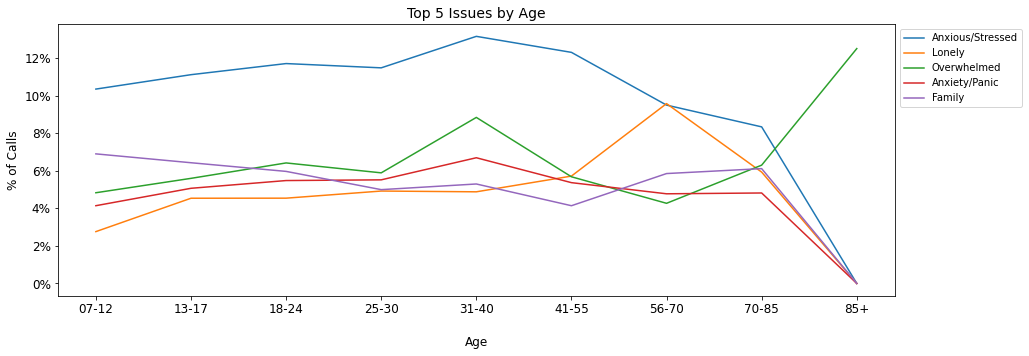

In [51]:
issue_line_chart(long_demo, short_demo)

### Top 5 Issues By Gender Identity

In [52]:
long_demo = 'CRISIS Demographics - Gender Identity'
short_demo = 'Gender'

In [53]:
top5_issue_cumulative(long_demo)

,index,count
0,Anxious/Stressed,7832
1,Overwhelmed,4122
2,Lonely,4020
3,Sad/Depressed,3608
4,Family,3269


In [54]:
top5_demo_issue_counts(long_demo)

,CRISIS Demographics - Gender Identity,Anxious/Stressed,Overwhelmed,Lonely,Sad/Depressed,Family,Total Number of Issues
0,Female,5095,2804,2377,2406,2232,41211
1,Genderqueer,1,1,0,0,1,8
2,Male,2718,1305,1636,1197,1027,23639
3,Transgender,8,6,3,1,3,78
4,Unidentified,10,6,4,4,6,77


In [55]:
top5_demo_issue_percent(long_demo)

,Anxious/Stressed,Overwhelmed,Lonely,Sad/Depressed,Family
CRISIS Demographics - Gender Identity,,,,,
Female,12.363204,6.804009,5.767878,5.838247,5.416030
Genderqueer,12.500000,12.500000,0.000000,0.000000,12.500000
Male,11.497948,5.520538,6.920767,5.063666,4.344515
Transgender,10.256410,7.692308,3.846154,1.282051,3.846154
Unidentified,12.987013,7.792208,5.194805,5.194805,7.792208


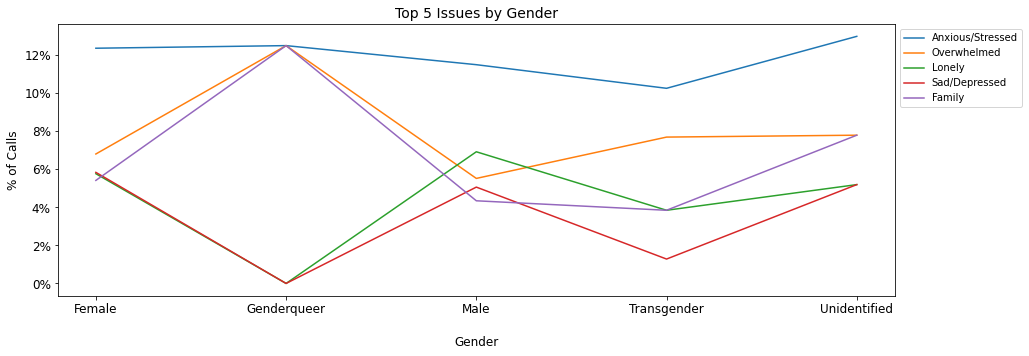

In [56]:
issue_line_chart(long_demo, short_demo)

### Top 5 Issues By Ethnicity

In [57]:
long_demo = 'CRISIS Demographics - Ethnicity'
short_demo = 'Ethnicity'

In [58]:
top5_issue_cumulative(long_demo)

,index,count
0,Anxious/Stressed,4391
1,Lonely,2594
2,Overwhelmed,2281
3,Sad/Depressed,2118
4,Family,2113


In [59]:
top5_demo_issue_counts(long_demo)

,CRISIS Demographics - Ethnicity,Anxious/Stressed,Lonely,Overwhelmed,Sad/Depressed,Family,Total Number of Issues
0,African-American,991,621,539,445,551,9788
1,Asian,14,3,10,10,6,95
2,Caucasian,3280,1915,1671,1589,1508,27563
3,Hispanic/Latino,31,11,16,17,16,318
4,Multiracial,6,3,4,5,3,65
5,Native American,2,0,1,1,2,13
6,Other,14,8,6,7,5,132
7,Unidentified/unknown,53,33,34,44,22,577


In [60]:
top5_demo_issue_percent(long_demo)

,Anxious/Stressed,Lonely,Overwhelmed,Sad/Depressed,Family
CRISIS Demographics - Ethnicity,,,,,
African-American,10.124642,6.344503,5.506743,4.546383,5.629342
Asian,14.736842,3.157895,10.526316,10.526316,6.315789
Caucasian,11.900011,6.947720,6.062475,5.764975,5.471103
Hispanic/Latino,9.748428,3.459119,5.031447,5.345912,5.031447
Multiracial,9.230769,4.615385,6.153846,7.692308,4.615385
Native American,15.384615,0.000000,7.692308,7.692308,15.384615
Other,10.606061,6.060606,4.545455,5.303030,3.787879
Unidentified/unknown,9.185442,5.719237,5.892548,7.625650,3.812825


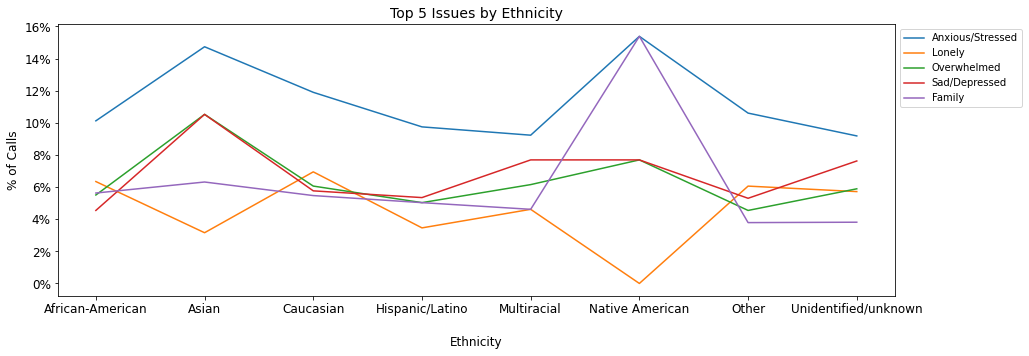

In [61]:
issue_line_chart(long_demo, short_demo)

### Top 5 Issues By Marital Status

In [62]:
long_demo = 'CRISIS Demographics - Education Level'
short_demo = 'Education Level'

In [63]:
top5_issue_cumulative(long_demo)

,index,count
0,Anxious/Stressed,1268
1,Lonely,974
2,Content,648
3,Anxiety/Panic,584
4,Sad/Depressed,556


In [64]:
top5_demo_issue_counts(long_demo)

,CRISIS Demographics - Education Level,Anxious/Stressed,Lonely,Content,Anxiety/Panic,Sad/Depressed,Total Number of Issues
0,College graduate,150,159,155,58,46,1559
1,High school diploma/GED,588,295,181,267,202,4507
2,Masters/PhD graduate,226,184,51,87,155,1701
3,Some college,268,312,253,159,122,3340
4,Some graduate level work,11,6,0,2,9,74
5,Some high school,25,18,8,11,22,259


In [65]:
top5_demo_issue_percent(long_demo)

,Anxious/Stressed,Lonely,Content,Anxiety/Panic,Sad/Depressed
CRISIS Demographics - Education Level,,,,,
College graduate,9.621552,10.198845,9.942271,3.720334,2.950609
High school diploma/GED,13.046372,6.545374,4.015975,5.924118,4.481917
Masters/PhD graduate,13.286302,10.817166,2.998236,5.114638,9.112287
Some college,8.023952,9.341317,7.574850,4.760479,3.652695
Some graduate level work,14.864865,8.108108,0.000000,2.702703,12.162162
Some high school,9.652510,6.949807,3.088803,4.247104,8.494208


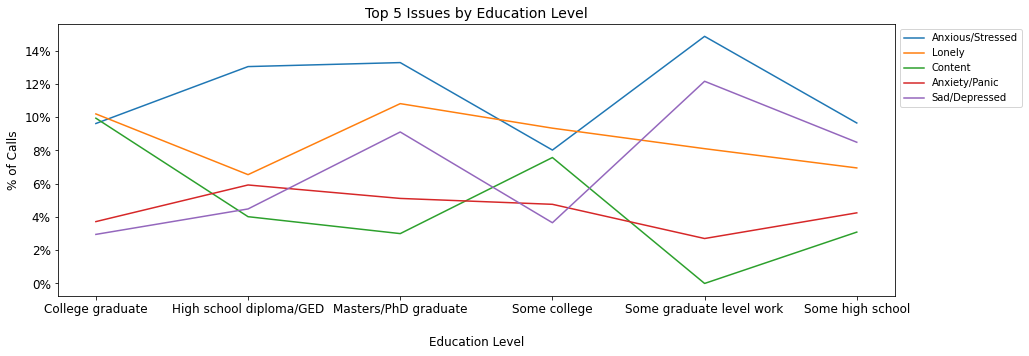

In [66]:
issue_line_chart(long_demo, short_demo)

### Top 5 Issues By Income

In [67]:
long_demo = 'CRISIS Demographics - Income'
short_demo = 'Income'

In [68]:
top5_issue_cumulative(long_demo)

,index,count
0,Anxious/Stressed,1711
1,Overwhelmed,933
2,Lonely,931
3,Anxiety/Panic,790
4,Sad/Depressed,759


In [69]:
top5_demo_issue_counts(long_demo)

,CRISIS Demographics - Income,Anxious/Stressed,Overwhelmed,Lonely,Anxiety/Panic,Sad/Depressed,Total Number of Issues
0,FT employment,213,115,116,73,147,1629
1,PT employment,260,121,188,112,173,2065
2,PT employment; Unemployed,1,1,0,1,0,6
3,SNAP,0,0,1,0,0,9
4,SSDI,345,154,246,214,110,3476
5,SSDI; PT employment,3,2,1,2,1,21
6,SSDI; SNAP,46,18,28,20,16,480
7,SSDI; Unemployed,345,178,158,171,114,2770
8,SSI,30,12,19,6,20,265
9,SSI; PT employment,3,3,2,0,1,20


In [70]:
top5_demo_issue_percent(long_demo)

,Anxious/Stressed,Overwhelmed,Lonely,Anxiety/Panic,Sad/Depressed
CRISIS Demographics - Income,,,,,
FT employment,13.075506,7.059546,7.120933,4.481277,9.023941
PT employment,12.590799,5.859564,9.104116,5.423729,8.377724
PT employment; Unemployed,16.666667,16.666667,0.000000,16.666667,0.000000
SNAP,0.000000,0.000000,11.111111,0.000000,0.000000
SSDI,9.925201,4.430380,7.077100,6.156502,3.164557
SSDI; PT employment,14.285714,9.523810,4.761905,9.523810,4.761905
SSDI; SNAP,9.583333,3.750000,5.833333,4.166667,3.333333
SSDI; Unemployed,12.454874,6.425993,5.703971,6.173285,4.115523
SSI,11.320755,4.528302,7.169811,2.264151,7.547170


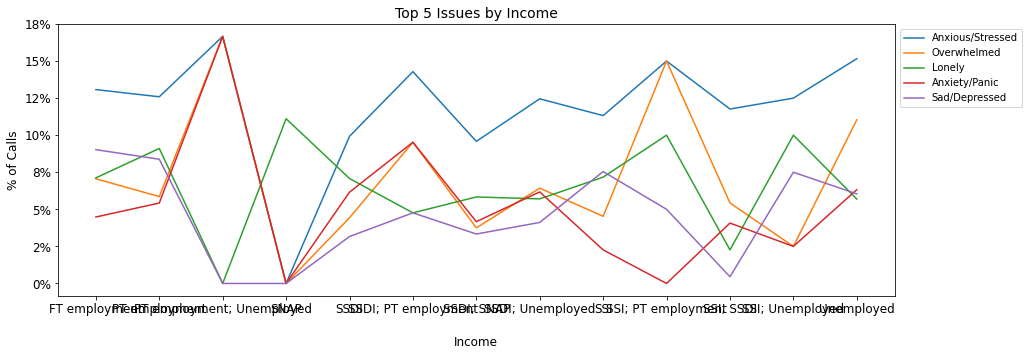

In [71]:
issue_line_chart(long_demo, short_demo)